# Graph embedding using [DeepWalk](https://arxiv.org/pdf/1403.6652.pdf) and[ node2vec](https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

from graph_embedding_continuity import *

In [2]:
N = 20
# Barabasi-Albert parameter
m = 3

N_TRAIN = 50
EMBEDDING_SIZE = 2
WALK_LENGTH = 10
WINDOW_SIZE = 2
N_NEG = 2
HIDDEN_SIZE = 16

USE_CUDA = False

## Discontinuous embedding under removal of an edge that disconnects the graph or a random intra-community edge

In [5]:
# generate a random graph that bridges to clusters
G1 = nx.barabasi_albert_graph(N, 2)
G2 = nx.barabasi_albert_graph(N, 2)

# relabel nodes of G2
d = {}
for v in G1.nodes:
    d[v] = N+v
G2 = nx.relabel_nodes(G2, d)

G = nx.union(G1, G2)

G.add_edge(N-1, N)
# add some random weights on each edge
for _, _, d in G.edges(data=True):
    d['weight'] = np.random.rand()
    
# save layout
pos = nx.spring_layout(G)

# create new graphs by removing either the bridge edge or an intra-community edge 
# (for instance the first one in the edge list), in different order.
u_removed, v_removed = list(G.edges)[0]

G1 = deepcopy(G)
G2 = deepcopy(G)
# remove bridge
G1.remove_edge(N-1, N)
# remove some edge
G2.remove_edge(u_removed, v_removed)

G12 = deepcopy(G1)
G21 = deepcopy(G2)
# remove some edge
G12.remove_edge(u_removed, v_removed)
# remove bridge
G21.remove_edge(N-1, N)

### DeepWalk

In [19]:
emb_words_dw, emb_contexts_dw = deepwalk_embedding_time_reg([G, G1, G12],
                                                            k=EMBEDDING_SIZE,
                                                            n_train=N_TRAIN,
                                                            walk_length=WALK_LENGTH,
                                                            window_size=WINDOW_SIZE,
                                                            n_neg=N_NEG,
                                                            hidden_size = HIDDEN_SIZE,
                                                            use_cuda=USE_CUDA,
                                                           )

emb_word_01_dw, emb_1_word_dw, emb_12_word_dw = emb_words_dw
emb_context_01_dw, emb_1_context_dw, emb_12_context_dw = emb_contexts_dw

emb_words_dw, emb_contexts_dw = deepwalk_embedding_time_reg([G, G2, G21],
                                                            k=EMBEDDING_SIZE,
                                                            n_train=N_TRAIN,
                                                            walk_length=WALK_LENGTH,
                                                            window_size=WINDOW_SIZE,
                                                            n_neg=N_NEG,
                                                            hidden_size = HIDDEN_SIZE,
                                                            use_cuda=USE_CUDA,
                                                           )

emb_word_02_dw, emb_2_word_dw, emb_21_word_dw = emb_words_dw
emb_context_02_dw, emb_2_context_dw, emb_21_context_dw = emb_contexts_dw

Epoch : 1/50: 100%|███████████████████████████████████| 40.0/40.0 [00:01<00:00, 39.3it/s, loss=51.3]
Epoch : 10/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 35.3it/s, loss=50.2]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.9it/s, loss=44.9]
Epoch : 30/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 40.0it/s, loss=45.4]
Epoch : 40/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 44.0it/s, loss=42.2]
Epoch : 50/50: 100%|████████████████████████████████████| 40.0/40.0 [00:00<00:00, 42.0it/s, loss=41]
Epoch : 1/50: 100%|███████████████████████████████████| 40.0/40.0 [00:00<00:00, 42.6it/s, loss=41.5]
Epoch : 10/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 43.7it/s, loss=40.1]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 42.1it/s, loss=39.8]
Epoch : 30/50: 100%|████████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.7it/s,

### node2vec -  depth-first incentive

In [7]:
p = 1.0
q = 1/3

emb_words_dfs, emb_contexts_dfs = node2vec_embedding_time_reg([G, G1, G12],
                                                              p=p,
                                                              q=q,
                                                              k=EMBEDDING_SIZE,
                                                              n_train=N_TRAIN,
                                                              walk_length=WALK_LENGTH,
                                                              window_size=WINDOW_SIZE,
                                                              n_neg=N_NEG,
                                                              hidden_size = HIDDEN_SIZE,
                                                              use_cuda=USE_CUDA,
                                                             )

emb_word_01_dfs, emb_1_word_dfs, emb_12_word_dfs = emb_words_dfs
emb_context_01_dfs, emb_1_context_dfs, emb_12_context_dfs = emb_contexts_dfs

emb_words_dfs, emb_contexts_dfs = node2vec_embedding_time_reg([G, G2, G21],
                                                              p=p,
                                                              q=q,
                                                              k=EMBEDDING_SIZE,
                                                              n_train=N_TRAIN,
                                                              walk_length=WALK_LENGTH,
                                                              window_size=WINDOW_SIZE,
                                                              n_neg=N_NEG,
                                                              hidden_size = HIDDEN_SIZE,
                                                              use_cuda=USE_CUDA,
                                                             )

emb_word_02_dfs, emb_2_word_dfs, emb_21_word_dfs = emb_words_dfs
emb_context_02_dfs, emb_2_context_dfs, emb_21_context_dfs = emb_contexts_dfs

Epoch : 1/50: 100%|███████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.8it/s, loss=51.2]
Epoch : 10/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.5it/s, loss=47.9]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.9it/s, loss=38.5]
Epoch : 30/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.2it/s, loss=36.7]
Epoch : 40/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.5it/s, loss=37.3]
Epoch : 50/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.3it/s, loss=35.8]
Epoch : 1/50: 100%|█████████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.7it/s, loss=36]
Epoch : 10/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 38.0it/s, loss=36.8]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 41.5it/s, loss=36.1]
Epoch : 30/50: 100%|████████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.6it/s,

### node2vec - breadth-first incentive

In [8]:
p = 1.0
q = 3.0

emb_words_bfs, emb_contexts_bfs = node2vec_embedding_time_reg([G, G1, G12],
                                                              p=p,
                                                              q=q,
                                                              k=EMBEDDING_SIZE,
                                                              n_train=N_TRAIN,
                                                              walk_length=WALK_LENGTH,
                                                              window_size=WINDOW_SIZE,
                                                              n_neg=N_NEG,
                                                              hidden_size = HIDDEN_SIZE,
                                                              use_cuda=USE_CUDA,
                                                             )

emb_word_01_bfs, emb_1_word_bfs, emb_12_word_bfs = emb_words_bfs
emb_context_01_bfs, emb_1_context_bfs, emb_12_context_bfs = emb_contexts_bfs

emb_words_bfs, emb_contexts_bfs = node2vec_embedding_time_reg([G, G2, G21],
                                                              p=p,
                                                              q=q,
                                                              k=EMBEDDING_SIZE,
                                                              n_train=N_TRAIN,
                                                              walk_length=WALK_LENGTH,
                                                              window_size=WINDOW_SIZE,
                                                              n_neg=N_NEG,
                                                              hidden_size = HIDDEN_SIZE,
                                                              use_cuda=USE_CUDA,
                                                             )

emb_word_02_bfs, emb_2_word_bfs, emb_21_word_bfs = emb_words_bfs
emb_context_02_bfs, emb_2_context_bfs, emb_21_context_bfs = emb_contexts_bfs

Epoch : 1/50: 100%|███████████████████████████████████| 40.0/40.0 [00:01<00:00, 38.0it/s, loss=51.2]
Epoch : 10/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.7it/s, loss=50.9]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 39.5it/s, loss=45.5]
Epoch : 30/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 39.3it/s, loss=44.6]
Epoch : 40/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 39.5it/s, loss=42.2]
Epoch : 50/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 39.9it/s, loss=39.6]
Epoch : 1/50: 100%|█████████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.2it/s, loss=40]
Epoch : 10/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 38.7it/s, loss=37.2]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 40.0it/s, loss=36.6]
Epoch : 30/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 38.8it/s, l

## Compare

In [20]:
wass_1_word_dw = wasserstein_metric(emb_word_01_dw, emb_1_word_dw)
wass_1_context_dw = wasserstein_metric(emb_context_01_dw, emb_1_context_dw)
wass_2_word_dw = wasserstein_metric(emb_word_02_dw, emb_2_word_dw)
wass_2_context_dw = wasserstein_metric(emb_context_02_dw, emb_2_context_dw)
wass_12_word_dw = wasserstein_metric(emb_word_01_dw, emb_12_word_dw)
wass_12_context_dw = wasserstein_metric(emb_context_01_dw, emb_12_context_dw)
wass_21_word_dw = wasserstein_metric(emb_word_02_dw, emb_21_word_dw)
wass_21_context_dw = wasserstein_metric(emb_context_02_dw, emb_21_context_dw)

wass_1_word_dfs = wasserstein_metric(emb_word_01_dfs, emb_1_word_dfs)
wass_1_context_dfs = wasserstein_metric(emb_context_01_dfs, emb_1_context_dfs)
wass_2_word_dfs = wasserstein_metric(emb_word_02_dfs, emb_2_word_dfs)
wass_2_context_dfs = wasserstein_metric(emb_context_02_dfs, emb_2_context_dfs)
wass_12_word_dfs = wasserstein_metric(emb_word_01_dfs, emb_12_word_dfs)
wass_12_context_dfs = wasserstein_metric(emb_context_01_dfs, emb_12_context_dfs)
wass_21_word_dfs = wasserstein_metric(emb_word_02_dfs, emb_21_word_dfs)
wass_21_context_dfs = wasserstein_metric(emb_context_02_dfs, emb_21_context_dfs)

wass_1_word_bfs = wasserstein_metric(emb_word_01_bfs, emb_1_word_bfs)
wass_1_context_bfs = wasserstein_metric(emb_context_01_bfs, emb_1_context_bfs)
wass_2_word_bfs = wasserstein_metric(emb_word_02_bfs, emb_2_word_bfs)
wass_2_context_bfs = wasserstein_metric(emb_context_02_bfs, emb_2_context_bfs)
wass_12_word_bfs = wasserstein_metric(emb_word_01_bfs, emb_12_word_bfs)
wass_12_context_bfs = wasserstein_metric(emb_context_01_bfs, emb_12_context_bfs)
wass_21_word_bfs = wasserstein_metric(emb_word_02_bfs, emb_21_word_bfs)
wass_21_context_bfs = wasserstein_metric(emb_context_02_bfs, emb_21_context_bfs)

### DeepWalk (word)

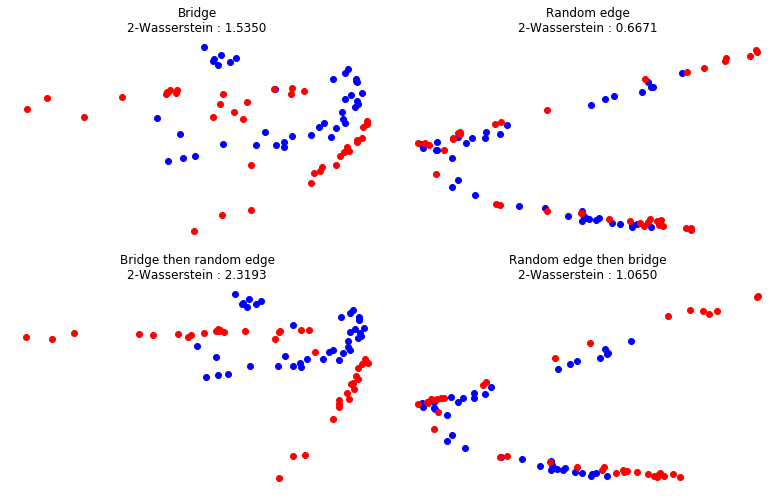

In [21]:
# plot the graph
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

ax = axes[0, 0]
ax.scatter(emb_word_01_dw[:, 0], emb_word_01_dw[:, 1], label='original', color='b')
ax.scatter(emb_1_word_dw[:, 0], emb_1_word_dw[:, 1], label='removed', color='r')
ax.set_title('Bridge\n2-Wasserstein : {:.4f}'.format(wass_1_word_dw))
ax.axis('off')

ax = axes[0, 1]
ax.scatter(emb_word_02_dw[:, 0], emb_word_02_dw[:, 1], label='original', color='b')
ax.scatter(emb_2_word_dw[:, 0], emb_2_word_dw[:, 1], label='removed', color='r')
ax.set_title('Random edge\n2-Wasserstein : {:.4f}'.format(wass_2_word_dw))
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb_word_01_dw[:, 0], emb_word_01_dw[:, 1], label='original', color='b')
ax.scatter(emb_12_word_dw[:, 0], emb_12_word_dw[:, 1], label='removed', color='r')
ax.set_title('Bridge then random edge\n2-Wasserstein : {:.4f}'.format(wass_12_word_dw))
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb_word_02_dw[:, 0], emb_word_02_dw[:, 1], label='original', color='b')
ax.scatter(emb_21_word_dw[:, 0], emb_21_word_dw[:, 1], label='removed', color='r')
ax.set_title('Random edge then bridge\n2-Wasserstein : {:.4f}'.format(wass_21_word_dw))
ax.axis('off')

plt.tight_layout()
plt.show()
             
fig.savefig('deepwalk_word_commute.eps')

### DeepWalk (context)

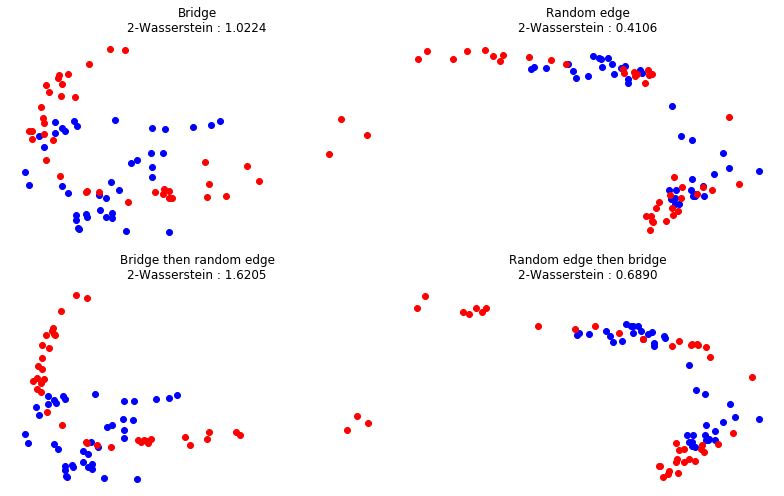

In [22]:
# plot the graph
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

ax = axes[0, 0]
ax.scatter(emb_context_01_dw[:, 0], emb_context_01_dw[:, 1], label='original', color='b')
ax.scatter(emb_1_context_dw[:, 0], emb_1_context_dw[:, 1], label='removed', color='r')
ax.set_title('Bridge\n2-Wasserstein : {:.4f}'.format(wass_1_context_dw))
ax.axis('off')

ax = axes[0, 1]
ax.scatter(emb_context_02_dw[:, 0], emb_context_02_dw[:, 1], label='original', color='b')
ax.scatter(emb_2_context_dw[:, 0], emb_2_context_dw[:, 1], label='removed', color='r')
ax.set_title('Random edge\n2-Wasserstein : {:.4f}'.format(wass_2_context_dw))
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb_context_01_dw[:, 0], emb_context_01_dw[:, 1], label='original', color='b')
ax.scatter(emb_12_context_dw[:, 0], emb_12_context_dw[:, 1], label='removed', color='r')
ax.set_title('Bridge then random edge\n2-Wasserstein : {:.4f}'.format(wass_12_context_dw))
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb_context_02_dw[:, 0], emb_context_02_dw[:, 1], label='original', color='b')
ax.scatter(emb_21_context_dw[:, 0], emb_21_context_dw[:, 1], label='removed', color='r')
ax.set_title('Random edge then bridge\n2-Wasserstein : {:.4f}'.format(wass_21_context_dw))
ax.axis('off')

plt.tight_layout()
plt.show()
             
fig.savefig('deepwalk_context_commute.eps')

### node2vec DFS (word)

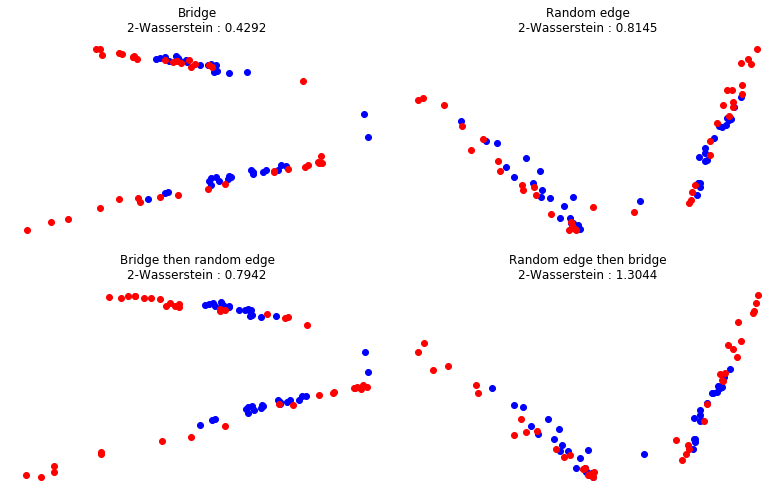

In [15]:
# plot the graph
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

ax = axes[0, 0]
ax.scatter(emb_word_01_dfs[:, 0], emb_word_01_dfs[:, 1], label='original', color='b')
ax.scatter(emb_1_word_dfs[:, 0], emb_1_word_dfs[:, 1], label='removed', color='r')
ax.set_title('Bridge\n2-Wasserstein : {:.4f}'.format(wass_1_word_dfs))
ax.axis('off')

ax = axes[0, 1]
ax.scatter(emb_word_02_dfs[:, 0], emb_word_02_dfs[:, 1], label='original', color='b')
ax.scatter(emb_2_word_dfs[:, 0], emb_2_word_dfs[:, 1], label='removed', color='r')
ax.set_title('Random edge\n2-Wasserstein : {:.4f}'.format(wass_2_word_dfs))
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb_word_01_dfs[:, 0], emb_word_01_dfs[:, 1], label='original', color='b')
ax.scatter(emb_12_word_dfs[:, 0], emb_12_word_dfs[:, 1], label='removed', color='r')
ax.set_title('Bridge then random edge\n2-Wasserstein : {:.4f}'.format(wass_12_word_dfs))
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb_word_02_dfs[:, 0], emb_word_02_dfs[:, 1], label='original', color='b')
ax.scatter(emb_21_word_dfs[:, 0], emb_21_word_dfs[:, 1], label='removed', color='r')
ax.set_title('Random edge then bridge\n2-Wasserstein : {:.4f}'.format(wass_21_word_dfs))
ax.axis('off')

plt.tight_layout()
plt.show()
             
fig.savefig('node2vec_dfs_word_commute.eps')

### node2vec DFS (context)

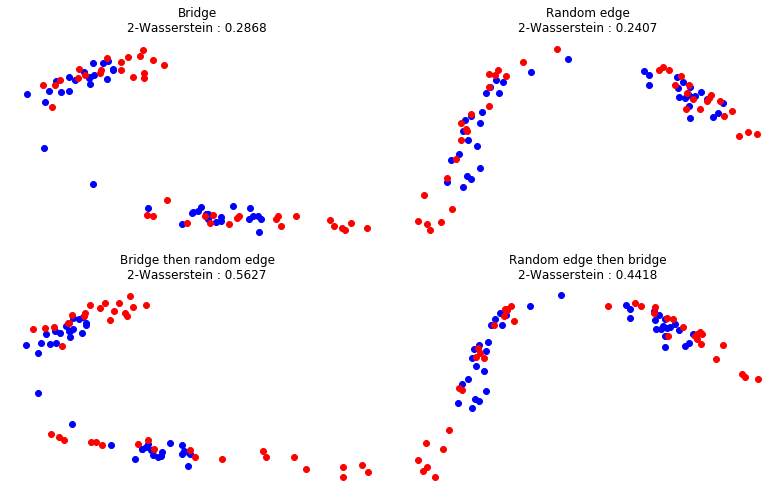

In [16]:
# plot the graph
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

ax = axes[0, 0]
ax.scatter(emb_context_01_dfs[:, 0], emb_context_01_dfs[:, 1], label='original', color='b')
ax.scatter(emb_1_context_dfs[:, 0], emb_1_context_dfs[:, 1], label='removed', color='r')
ax.set_title('Bridge\n2-Wasserstein : {:.4f}'.format(wass_1_context_dfs))
ax.axis('off')

ax = axes[0, 1]
ax.scatter(emb_context_02_dfs[:, 0], emb_context_02_dfs[:, 1], label='original', color='b')
ax.scatter(emb_2_context_dfs[:, 0], emb_2_context_dfs[:, 1], label='removed', color='r')
ax.set_title('Random edge\n2-Wasserstein : {:.4f}'.format(wass_2_context_dfs))
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb_context_01_dfs[:, 0], emb_context_01_dfs[:, 1], label='original', color='b')
ax.scatter(emb_12_context_dfs[:, 0], emb_12_context_dfs[:, 1], label='removed', color='r')
ax.set_title('Bridge then random edge\n2-Wasserstein : {:.4f}'.format(wass_12_context_dfs))
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb_context_02_dfs[:, 0], emb_context_02_dfs[:, 1], label='original', color='b')
ax.scatter(emb_21_context_dfs[:, 0], emb_21_context_dfs[:, 1], label='removed', color='r')
ax.set_title('Random edge then bridge\n2-Wasserstein : {:.4f}'.format(wass_21_context_dfs))
ax.axis('off')

plt.tight_layout()
plt.show()
             
fig.savefig('node2vec_dfs_context_commute.eps')

### node2vec BFS (word)

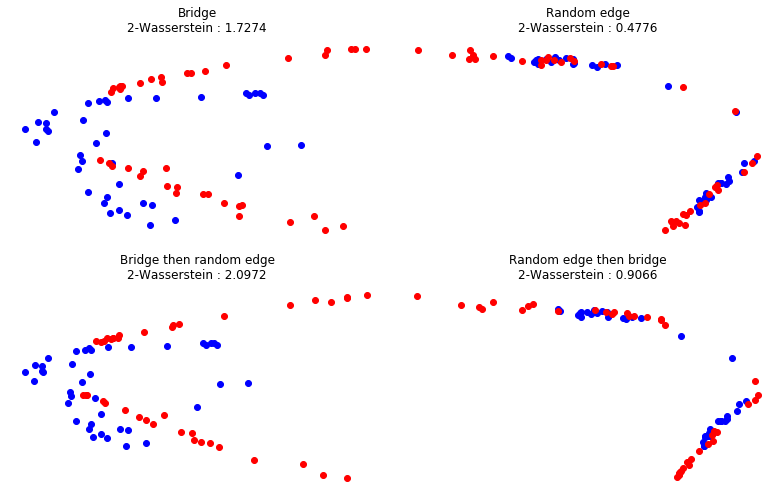

In [17]:
# plot the graph
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

ax = axes[0, 0]
ax.scatter(emb_word_01_bfs[:, 0], emb_word_01_bfs[:, 1], label='original', color='b')
ax.scatter(emb_1_word_bfs[:, 0], emb_1_word_bfs[:, 1], label='removed', color='r')
ax.set_title('Bridge\n2-Wasserstein : {:.4f}'.format(wass_1_word_bfs))
ax.axis('off')

ax = axes[0, 1]
ax.scatter(emb_word_02_bfs[:, 0], emb_word_02_bfs[:, 1], label='original', color='b')
ax.scatter(emb_2_word_bfs[:, 0], emb_2_word_bfs[:, 1], label='removed', color='r')
ax.set_title('Random edge\n2-Wasserstein : {:.4f}'.format(wass_2_word_bfs))
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb_word_01_bfs[:, 0], emb_word_01_bfs[:, 1], label='original', color='b')
ax.scatter(emb_12_word_bfs[:, 0], emb_12_word_bfs[:, 1], label='removed', color='r')
ax.set_title('Bridge then random edge\n2-Wasserstein : {:.4f}'.format(wass_12_word_bfs))
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb_word_02_bfs[:, 0], emb_word_02_bfs[:, 1], label='original', color='b')
ax.scatter(emb_21_word_bfs[:, 0], emb_21_word_bfs[:, 1], label='removed', color='r')
ax.set_title('Random edge then bridge\n2-Wasserstein : {:.4f}'.format(wass_21_word_bfs))
ax.axis('off')

plt.tight_layout()
plt.show()
             
fig.savefig('node2vec_bfs_word_commute.eps')

### node2vec BFS (context)

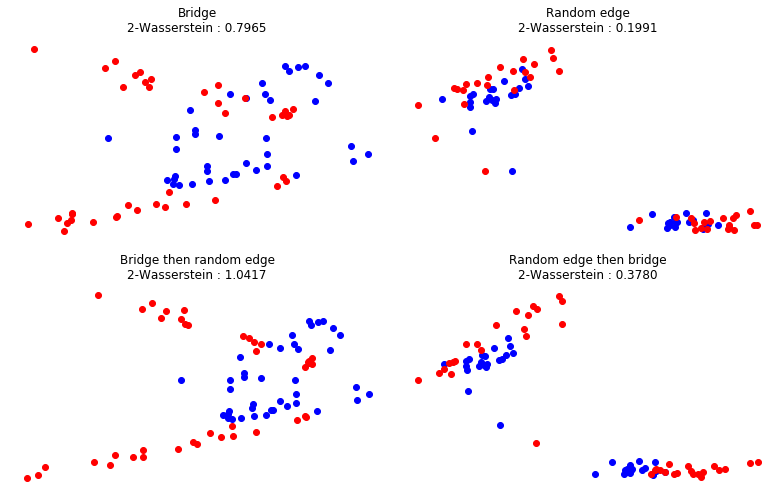

In [18]:
# plot the graph
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

ax = axes[0, 0]
ax.scatter(emb_context_01_bfs[:, 0], emb_context_01_bfs[:, 1], label='original', color='b')
ax.scatter(emb_1_context_bfs[:, 0], emb_1_context_bfs[:, 1], label='removed', color='r')
ax.set_title('Bridge\n2-Wasserstein : {:.4f}'.format(wass_1_context_bfs))
ax.axis('off')

ax = axes[0, 1]
ax.scatter(emb_context_02_bfs[:, 0], emb_context_02_bfs[:, 1], label='original', color='b')
ax.scatter(emb_2_context_bfs[:, 0], emb_2_context_bfs[:, 1], label='removed', color='r')
ax.set_title('Random edge\n2-Wasserstein : {:.4f}'.format(wass_2_context_bfs))
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb_context_01_bfs[:, 0], emb_context_01_bfs[:, 1], label='original', color='b')
ax.scatter(emb_12_context_bfs[:, 0], emb_12_context_bfs[:, 1], label='removed', color='r')
ax.set_title('Bridge then random edge\n2-Wasserstein : {:.4f}'.format(wass_12_context_bfs))
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb_context_02_bfs[:, 0], emb_context_02_bfs[:, 1], label='original', color='b')
ax.scatter(emb_21_context_bfs[:, 0], emb_21_context_bfs[:, 1], label='removed', color='r')
ax.set_title('Random edge then bridge\n2-Wasserstein : {:.4f}'.format(wass_21_context_bfs))
ax.axis('off')

plt.tight_layout()
plt.show()
             
fig.savefig('node2vec_bfs_context_commute.eps')

### Conclusion

Deepwalk and node2vec are sensitive to the order of removal of a sequence of edges; indeed, when training successive neural networks, either training is reinitialized each time, in which case the intrinsic randomness and non-convexity of the loss minimization problem may result in different embedding each time, or training at each step starts from the previously trained weights, in which case final embeddings are also different (typically after removing the bridge, the network learns a very different embedding due to the radical change in the graph structure, and the subsequent embeddings resemble bear the mark of this first perturbation).

Numerically, the resulting embeddings are clearly different.